In [1]:
! pip install kaggle

In [2]:
! pip install nltk

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 1.47GB/s]


In [7]:
! unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [56]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_curve, roc_auc_score

In [31]:
df=pd.read_csv("/content/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [33]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [34]:
df["Class"].value_counts()

,count
Class,
0,284315
1,492


In [35]:
x=df.drop("Class",axis=1)
y=df["Class"]

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9986306660580738

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.61      0.56      0.59        98

    accuracy                           1.00     56962
   macro avg       0.81      0.78      0.79     56962
weighted avg       1.00      1.00      1.00     56962



In [47]:
y_probs = model.predict_proba(x_test)[:, 1]

In [49]:
thresholds = [0.5, 0.3, 0.1]

for threshold in thresholds:
    print(f"\nThreshold: {threshold}")

    y_pred = (y_probs >= threshold).astype(int)

    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Confusion Matrix:")
    print(cm)
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")



Threshold: 0.5
Confusion Matrix:
[[56829    35]
 [   43    55]]
Precision: 0.6111
Recall: 0.5612
F1-score: 0.5851

Threshold: 0.3
Confusion Matrix:
[[56805    59]
 [   38    60]]
Precision: 0.5042
Recall: 0.6122
F1-score: 0.5530

Threshold: 0.1
Confusion Matrix:
[[56624   240]
 [   34    64]]
Precision: 0.2105
Recall: 0.6531
F1-score: 0.3184


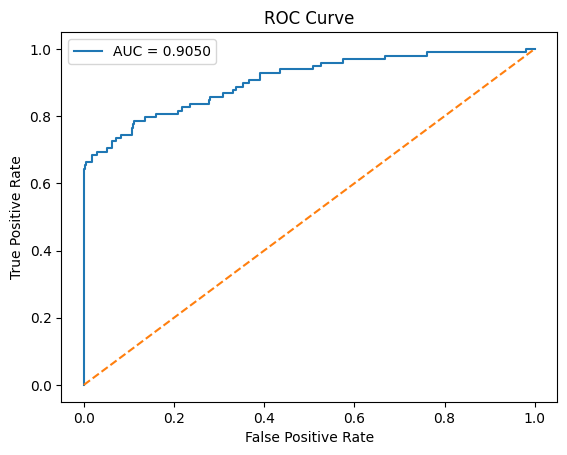

In [52]:
# Roc Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [53]:
model2=LogisticRegression(class_weight="balanced")
model2.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [54]:
y_pred2=model2.predict(x_test)
accuracy_score(y_test,y_pred2)

0.9677855412380183

In [55]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.93      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [57]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [60]:
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.90      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [67]:
metrics_data = {}

# Metrics for Default Logistic Regression
metrics_data['Default LR'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
}

# Metrics for Balanced Class Weight Logistic Regression
metrics_data['Balanced LR'] = {
    'Accuracy': accuracy_score(y_test, y_pred2),
    'Precision': precision_score(y_test, y_pred2),
    'Recall': recall_score(y_test, y_pred2),
    'F1-Score': f1_score(y_test, y_pred2)
}

# Metrics for SMOTE Logistic Regression
metrics_data['SMOTE LR'] = {
    'Accuracy': accuracy_score(y_test, y_pred_smote),
    'Precision': precision_score(y_test, y_pred_smote),
    'Recall': recall_score(y_test, y_pred_smote),
    'F1-Score': f1_score(y_test, y_pred_smote)
}

# Create a DataFrame from the metrics data
metrics_df = pd.DataFrame(metrics_data).T
print("Model Performance Metrics:")
print(metrics_df)

print("\nclassification_report for Default Logistic Regression:")
print(classification_report(y_test, y_pred))

print("\nclassification_report for Balanced Class Weight Logistic Regression:")
print(classification_report(y_test, y_pred2))
print("\nclassification_report for SMOTE Logistic Regression:")
print(classification_report(y_test, y_pred_smote))

Model Performance Metrics:
             Accuracy  Precision    Recall  F1-Score
Default LR   0.995190   0.210526  0.653061  0.318408
Balanced LR  0.967786   0.047421  0.928571  0.090233
SMOTE LR     0.979829   0.071720  0.897959  0.132830

classification_report for Default Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.21      0.65      0.32        98

    accuracy                           1.00     56962
   macro avg       0.60      0.82      0.66     56962
weighted avg       1.00      1.00      1.00     56962


classification_report for Balanced Class Weight Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.93      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.95      0.54     56962
weighted avg       1.00      0.97   

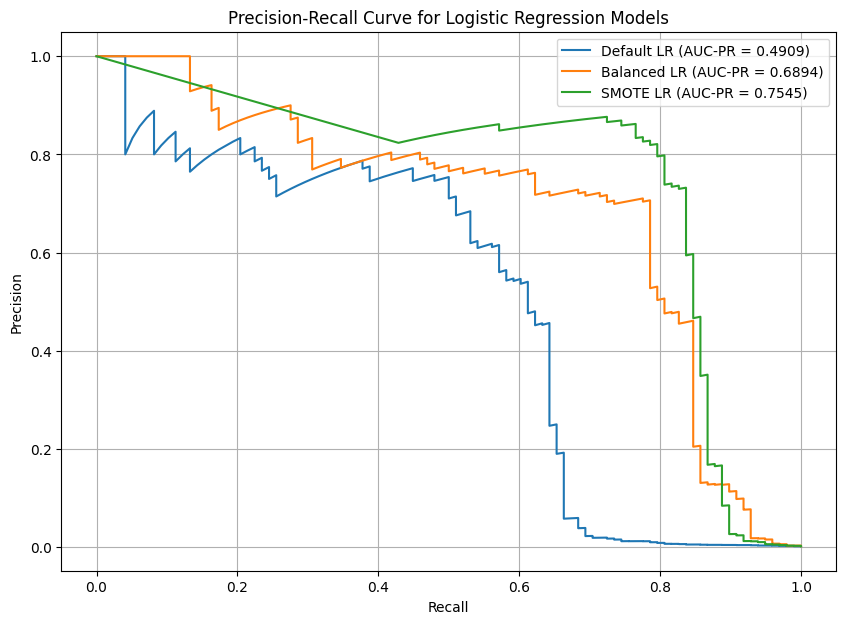

In [63]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# Default Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test, model.predict_proba(x_test)[:, 1])
auc_pr_lr = auc(recall_lr, precision_lr)
plt.plot(recall_lr, precision_lr, label=f'Default LR (AUC-PR = {auc_pr_lr:.4f})')

# Balanced Class Weight Logistic Regression
precision_lr_balanced, recall_lr_balanced, _ = precision_recall_curve(y_test, model2.predict_proba(x_test)[:, 1])
auc_pr_lr_balanced = auc(recall_lr_balanced, precision_lr_balanced)
plt.plot(recall_lr_balanced, precision_lr_balanced, label=f'Balanced LR (AUC-PR = {auc_pr_lr_balanced:.4f})')

# SMOTE Logistic Regression
precision_lr_smote, recall_lr_smote, _ = precision_recall_curve(y_test, model_smote.predict_proba(x_test)[:, 1])
auc_pr_lr_smote = auc(recall_lr_smote, precision_lr_smote)
plt.plot(recall_lr_smote, precision_lr_smote, label=f'SMOTE LR (AUC-PR = {auc_pr_lr_smote:.4f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression Models')
plt.legend()
plt.grid(True)
plt.show()